Epoch 1/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0999 - val_loss: 0.0355
Epoch 2/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0319 - val_loss: 0.0245
Epoch 3/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0235 - val_loss: 0.0206
Epoch 4/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0200 - val_loss: 0.0181
Epoch 5/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0179 - val_loss: 0.0165
Epoch 6/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 7/7
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0153 - val_loss: 0.0144


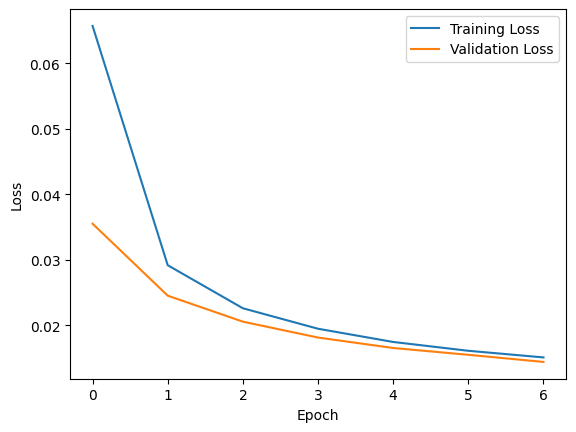

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0144
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Number of detected anomalies: 4419 out of 10000 samples


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, _), (test_images, _) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize

# Flatten images to match the input shape of the autoencoder (784,)
train_images_flat = train_images.reshape(-1, 784)
test_images_flat = test_images.reshape(-1, 784)

# Define encoder and decoder for the autoencoder model
latent_dim = 64
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(latent_dim, activation='relu')
])

decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(train_images_flat, train_images_flat, epochs=7, batch_size=256, 
                          validation_split=0.1, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Anomaly detection on test data
mse_loss = autoencoder.evaluate(test_images_flat, test_images_flat)
anomaly_threshold = mse_loss  # Set threshold based on mse_loss
test_predictions = autoencoder.predict(test_images_flat)

# Calculate MSE for each sample and identify anomalies
mse = np.mean(np.square(test_images_flat - test_predictions), axis=1)
anomalies = mse > anomaly_threshold
print(f"Number of detected anomalies: {np.sum(anomalies)} out of {len(anomalies)} samples")
